# Heerlen-Aachen Annotated Steel Microstructure Dataset 

This notebook contains the accompanying code for the Heerlen-Aachen Annotated Steel Microstructure Dataset. 
The dataset was created by Center for Actionable Resarch of Open Universiteit (CAROU) and the Steel Institute of RWTH Aachen University.

The dataset contains expert-annotated microstructures of steel that are visible on microscopy images. Two levels of annotations are provided. First, the point-of-interest (POI), that are the coordinates of points within specific microstructures. Secondly, the polygons that are the segments around the boundries of these structures.

This particular notebook guides the reader through a series of steps by loading POI and Polygon annotations, visualize them on base images, calculate morphological characteristics of the objects. 

Contact: Deniz Iren, PhD (deniz.iren@ou.nl | deniziren@gmail.com)

___
## File paths

Please set the paths of the following files before executing the code in this notebook. 

In [2]:
## IMAGE FILES
path_folder_images_png = 'D:/Aachen Steel Image/UPLOAD/PNG/'
path_folder_images_tiff = 'D:/Aachen Steel Image/UPLOAD/TIFF/'

## STEEL SAMPLE METADATA
path_file_metadata = "nature_scidata_steel_metadata.csv"

## POI ANNOTATIONS
path_file_annotations_POIcsv = "nature_scidata_heerlen_aachen_steel_annotations_POI.csv"

## POLYGON ANNOTATIONS 
path_file_annotations_POIs_polygons_pickle = 'nature_scidata_heerlen_aachen_steel_annotations_polygon.pickle'
path_file_annotations_POIs_polygons = 'nature_scidata_heerlen_aachen_steel_annotations_polygon.csv'

## MORPHOLOGICAL FEATURES
path_file_annotations_morphology = 'nature_scidata_heerlen_aachen_steel_morph.pickle'

## CALCULATED CONTOURS
path_file_AnnotationsPOIsAndPolygonsShapely = 'nature_scidata_dfPOIPolygonContourShapely.pickle'
path_file_Evaluations = 'nature_scidata_dfEvaluation.pickle'


___
## Image Set

The original output form of the microscope imagery is TIFF. However, for annotation purposes, PNG forms of the images were also created. 

In [3]:
import os

pngImageList = []
for f in os.listdir(path_folder_images_png):
    if f not in pngImageList:
        pngImageList.append(f)

print('Number of images: ',  len(set(pngImageList)))
print('Sample naming:', pngImageList[0:10])

Number of images:  2580
Sample naming: ['IMG_00001.png', 'IMG_00002.png', 'IMG_00003.png', 'IMG_00004.png', 'IMG_00005.png', 'IMG_00006.png', 'IMG_00007.png', 'IMG_00008.png', 'IMG_00009.png', 'IMG_00010.png']


___
## Metadata of the Steel Samples

The images belong to a variety of steel samples. The characteristics of the steel samples are associated with each image name. Following is the list of metadata attributes and their descriptions.

- __type__ describes the chemical composition of the steel. The specifics of the composition are not included in this dataset. 'Type' data is only provided to show compositionally different classes.
- __temperature__ describes the temperature of phase transformation. Possible values are 400°C and 500°C.
- __direction__: describes the direction on which axis the photograph has been taken. It can be 'Horizontal' for left-to-right and 'Vertical' for top-to-bottom.
- __distance__: describes the distance to the edge of the sample cross-section in either horizontal or vertical direction. The maximum distance in horizontal direction can be 24mm and in vertical direction 13mm. These distances are a result of the deformation of the sample bycompression.
- __magnification__: describes the magnification while taking images with the electron micro-scope. Samples have a 4000x magnification. 
- __angle__: describes what kind of angle (by selection of a specific Scanning Electron Detector) was used during the photo making procedure. 'tilt' indicates a tilt angle to create a bigger shadow on the sample. This helps to see the different topographic elevations of structures better. If 'perpendicular', then the electron ray flows perpendicular to thecamera lens which is also calledInLens. By using a perpendicular electron ray, the image usually gets brighter than otherwise. 


In [4]:
import pandas as pd 
dfMetadata = pd.read_csv(path_file_metadata)

print(len(dfMetadata))
dfMetadata.head()

2580


,image_url,type,temperature,direction,distance,magnification,angle
0,IMG_00001.png,01,500,Horizontal,0.0,4000,perpendicular
1,IMG_00002.png,01,500,Horizontal,0.0,4000,perpendicular
2,IMG_00003.png,01,500,Horizontal,0.0,4000,perpendicular
3,IMG_00004.png,01,500,Horizontal,0.0,4000,perpendicular
4,IMG_00005.png,01,500,Horizontal,0.0,4000,perpendicular


___

## POI Annotations

Load the CSV that contains lists of POI annotations done by three experts; A, B, and C. The CSV also contains doubleAgreement and tripleAgreement columns that have coordinates on which multiple experts have agreed upon. The POI annotation task was done on PNG files with 1024x768 pixel resolution. Therefore, the point coordinates are within the range of X: 0 - 1023 and Y: 0 - 767. 

In [5]:
import pandas as pd 
dfAnnotationsPOI = pd.read_csv(path_file_annotations_POIcsv, sep=";")
print("Number of images: ", len(dfAnnotationsPOI))
dfAnnotationsPOI.head()

Number of images:  1768


,image_url,A,B,C,doubleAgreement,tripleAgreement
0,IMG_01457.png,"[(616, 319), (820, 286), (986, 522), (880, 521...","[(883, 526), (519, 736), (432, 697), (364, 701...","[(267, 389), (137, 505), (426, 670), (522, 740...","[(627, 319), (820, 288), (881, 523), (477, 353...","[(626, 318), (880, 523), (476, 352), (519, 737..."
1,IMG_01458.png,"[(763, 186), (623, 205), (629, 432), (450, 347...","[(768, 180), (605, 217), (292, 638), (326, 714...","[(628, 429), (130, 400), (203, 493), (291, 639...","[(767, 182), (611, 212), (629, 429), (451, 351...","[(767, 182), (611, 212), (628, 429), (450, 350..."
2,IMG_01459.png,"[(441, 451), (409, 475), (130, 339), (44, 223)...","[(654, 148), (21, 640), (83, 564), (53, 222), ...","[(620, 175), (823, 340), (778, 205), (17, 648)...","[(441, 453), (128, 342), (48, 223), (777, 202)...","[(48, 223), (25, 646)]"
3,IMG_01460.png,"[(260, 449), (82, 387), (554, 663), (668, 690)...","[(246, 442), (84, 387), (567, 661), (782, 613)...","[(243, 439), (822, 597), (678, 685), (715, 159...","[(250, 444), (83, 387), (561, 662), (673, 688)...","[(250, 444), (714, 162)]"
4,IMG_01461.png,"[(754, 606), (901, 353), (567, 505), (522, 508...","[(51, 78), (284, 165), (907, 713), (789, 757),...","[(283, 165), (764, 203), (900, 362), (741, 624...","[(746, 619), (901, 359), (522, 510), (288, 165...","[(746, 618), (900, 358), (288, 165), (53, 71)]"


In [6]:
dfAnnotationsPOI.columns

Index(['image_url', 'A', 'B', 'C', 'doubleAgreement', 'tripleAgreement'], dtype='object')

Check POI annotation counts and descriptive statistics.

In [7]:
dfAnnotationsPOI_label_counts = dfAnnotationsPOI.copy()
dfAnnotationsPOI_label_counts.head()

,image_url,A,B,C,doubleAgreement,tripleAgreement
0,IMG_01457.png,"[(616, 319), (820, 286), (986, 522), (880, 521...","[(883, 526), (519, 736), (432, 697), (364, 701...","[(267, 389), (137, 505), (426, 670), (522, 740...","[(627, 319), (820, 288), (881, 523), (477, 353...","[(626, 318), (880, 523), (476, 352), (519, 737..."
1,IMG_01458.png,"[(763, 186), (623, 205), (629, 432), (450, 347...","[(768, 180), (605, 217), (292, 638), (326, 714...","[(628, 429), (130, 400), (203, 493), (291, 639...","[(767, 182), (611, 212), (629, 429), (451, 351...","[(767, 182), (611, 212), (628, 429), (450, 350..."
2,IMG_01459.png,"[(441, 451), (409, 475), (130, 339), (44, 223)...","[(654, 148), (21, 640), (83, 564), (53, 222), ...","[(620, 175), (823, 340), (778, 205), (17, 648)...","[(441, 453), (128, 342), (48, 223), (777, 202)...","[(48, 223), (25, 646)]"
3,IMG_01460.png,"[(260, 449), (82, 387), (554, 663), (668, 690)...","[(246, 442), (84, 387), (567, 661), (782, 613)...","[(243, 439), (822, 597), (678, 685), (715, 159...","[(250, 444), (83, 387), (561, 662), (673, 688)...","[(250, 444), (714, 162)]"
4,IMG_01461.png,"[(754, 606), (901, 353), (567, 505), (522, 508...","[(51, 78), (284, 165), (907, 713), (789, 757),...","[(283, 165), (764, 203), (900, 362), (741, 624...","[(746, 619), (901, 359), (522, 510), (288, 165...","[(746, 618), (900, 358), (288, 165), (53, 71)]"


In [8]:
for index, row in dfAnnotationsPOI_label_counts.iterrows():
    dfAnnotationsPOI_label_counts.loc[index, 'image_url'] =  row.image_url
    dfAnnotationsPOI_label_counts.loc[index, 'A_labels'] =  len(eval(row.A))
    dfAnnotationsPOI_label_counts.loc[index, 'B_labels'] =  len(eval(row.B))
    dfAnnotationsPOI_label_counts.loc[index, 'C_labels'] =  len(eval(row.C))
    dfAnnotationsPOI_label_counts.loc[index, 'doubleAgreementLabels'] =  len(eval(row.doubleAgreement))
    dfAnnotationsPOI_label_counts.loc[index, 'tripleAgreementLabels'] =  len(eval(row.tripleAgreement))
    
dfAnnotationsPOI_label_counts.dtypes

image_url                 object
A                         object
B                         object
C                         object
doubleAgreement           object
tripleAgreement           object
A_labels                 float64
B_labels                 float64
C_labels                 float64
doubleAgreementLabels    float64
tripleAgreementLabels    float64
dtype: object

In [9]:
dfAnnotationsPOI_label_counts.describe()

,A_labels,B_labels,C_labels,doubleAgreementLabels,tripleAgreementLabels
count,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,8.473982,5.469457,5.534502,5.039027,1.647624
std,5.462368,4.136627,3.228332,3.506507,1.698141
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,3.000000,2.000000,0.000000
50%,7.000000,5.000000,5.000000,4.000000,1.000000
75%,12.000000,8.000000,7.000000,7.000000,2.000000
max,29.000000,27.000000,20.000000,22.000000,12.000000


In [10]:
print("No of POI annotations placed by A:", dfAnnotationsPOI_label_counts.A_labels.sum())
print("No of POI annotations placed by B:",dfAnnotationsPOI_label_counts.B_labels.sum())
print("No of POI annotations placed by C:",dfAnnotationsPOI_label_counts.C_labels.sum())
print("No of POI annotations that were agreed upon by at least two experts:",dfAnnotationsPOI_label_counts.doubleAgreementLabels.sum())
print("No of POI annotations that were agreed upon by three experts::",dfAnnotationsPOI_label_counts.tripleAgreementLabels.sum())

No of POI annotations placed by A: 14982.0
No of POI annotations placed by B: 9670.0
No of POI annotations placed by C: 9785.0
No of POI annotations that were agreed upon by at least two experts: 8909.0
No of POI annotations that were agreed upon by three experts:: 2913.0


In [11]:
annotator_label_list = []
for index, row in dfAnnotationsPOI_label_counts.iterrows():
    annotator_label_list.append([row['image_url'], 'A', row['A_labels']])
    annotator_label_list.append([row['image_url'], 'B', row['B_labels']])
    annotator_label_list.append([row['image_url'], 'C', row['C_labels']])
print(len(annotator_label_list))

dfannotator_label_list = pd.DataFrame(annotator_label_list, columns=['image_url', 'Annotator','No of Annotations per Image'])
dfannotator_label_list.head()

5304


,image_url,Annotator,No of Annotations per Image
0,IMG_01457.png,A,29.0
1,IMG_01457.png,B,11.0
2,IMG_01457.png,C,11.0
3,IMG_01458.png,A,19.0
4,IMG_01458.png,B,9.0


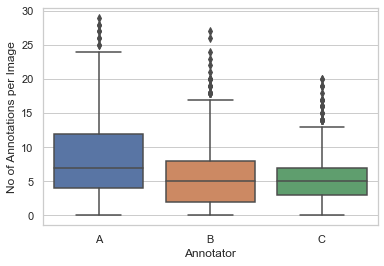

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=dfannotator_label_list['Annotator'], y=dfannotator_label_list['No of Annotations per Image'])


In [14]:
# No of images that have no agreed-upon annotations on them. 
print('No of images that have no agreed-upon annotations on them.', len(dfAnnotationsPOI_label_counts.loc[dfAnnotationsPOI_label_counts['doubleAgreementLabels'] == 0]))

No of images that have no agreed-upon annotations on them. 63


___

## Polygon Annotations

These are the polygons drawn by expert annotators. The experts were asked to draw polygons around the object that contains agreed-upon POIs. Therefore, the 'point' is always inside the 'poly'. 

A polygon, here, is a list of tuples that preserves the same order of placements during annotation. 

Example: [(720, 288), (725, 294), (731, 300),...]

In [15]:
import pandas as pd 
import ast
import pickle

dfAnnotationsPOIsAndPolygons = pd.read_csv(path_file_annotations_POIs_polygons, sep=";", converters={"point": ast.literal_eval, "polygon": ast.literal_eval})

#### Alternatively, you can use the pickle file to load this data table
#with open(path_file_annotations_POIs_polygons_pickle, 'rb') as handle:
#    dfAnnotationsPOIsAndPolygons = pickle.load(handle)

dfAnnotationsPOIsAndPolygons.head()

,image_url,point,polygon
0,IMG_01457.png,"(627, 319)","[(720, 288), (725, 294), (731, 300), (737, 302..."
1,IMG_01457.png,"(820, 288)","[(823, 268), (835, 271), (856, 276), (898, 281..."
2,IMG_01457.png,"(881, 523)","[(871, 542), (859, 527), (848, 526), (858, 509..."
3,IMG_01457.png,"(477, 353)","[(427, 358), (479, 342), (522, 329), (523, 342..."
4,IMG_01457.png,"(520, 737)","[(511, 717), (556, 721), (556, 729), (536, 734..."


In [16]:
dfAnnotationsPOIsAndPolygons.columns

Index(['image_url', 'point', 'polygon'], dtype='object')

In [17]:
print("No of polygon annotations: ", len(dfAnnotationsPOIsAndPolygons))
print("No of unique images: ", len(dfAnnotationsPOIsAndPolygons.image_url.unique()))

No of polygon annotations:  8909
No of unique images:  1705


___

## Visualization Methods

Use the following methods to visualize individual POIs, Polygons, or all together on a base image.

### Visualize one polygon and the corresponding point

Please, first execute the following method definitions.

In [18]:
import matplotlib.image as mpimg
from shapely.geometry import Polygon, Point

def displayImageWithAnnotations(img, pointList=[], polygonList=[], title='', displayFigure=False):
    ''' A generic method that displays things on a base image. 
        These things can be a list of points and polygons.'''
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    import matplotlib.patches as patches
    from matplotlib.patches import Polygon
   
    my_dpi = 96
    
    # Create figure and axes
    fig,ax = plt.subplots(figsize=(1024/my_dpi, 768/my_dpi), dpi=my_dpi, tight_layout=True)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    
    # Display the image
    ax.imshow(img)

    # Add the patch to the Axes
    colors = ['blue', 'red', 'green', 'yellow', 'magenta']
    plt.text(20, 20, title, color='white')
    for points in pointList:
        plt.scatter(int(points[0]), int(points[1]), s=50, c='red', marker='o')
    c_index = 0
    for polygon in polygonList:
        ax.add_patch(Polygon(polygon,  alpha=0.4, color=colors[c_index]))
        if c_index < 3:
            c_index = c_index + 1
        else:
            c_index = 0
    if not displayFigure:
        plt.close(fig)
    return fig

def visualizePOIPolygon(index, dfPOIPoly):
    dir = path_folder_images_png
    
    if index  >= len(dfPOIPoly):
        print("Index out of bounds. The dataframe includes ", len(dfPOIPoly), " elements.")
    else:
        image = dfPOIPoly.iloc[index]['image_url']
        img = mpimg.imread(dir + image)
        poi = dfPOIPoly.iloc[index]['point']
        poly = dfPOIPoly.iloc[index]['polygon']
        p = Polygon(poly)

        f = displayImageWithAnnotations(img, [poi], [poly])
        
        return f


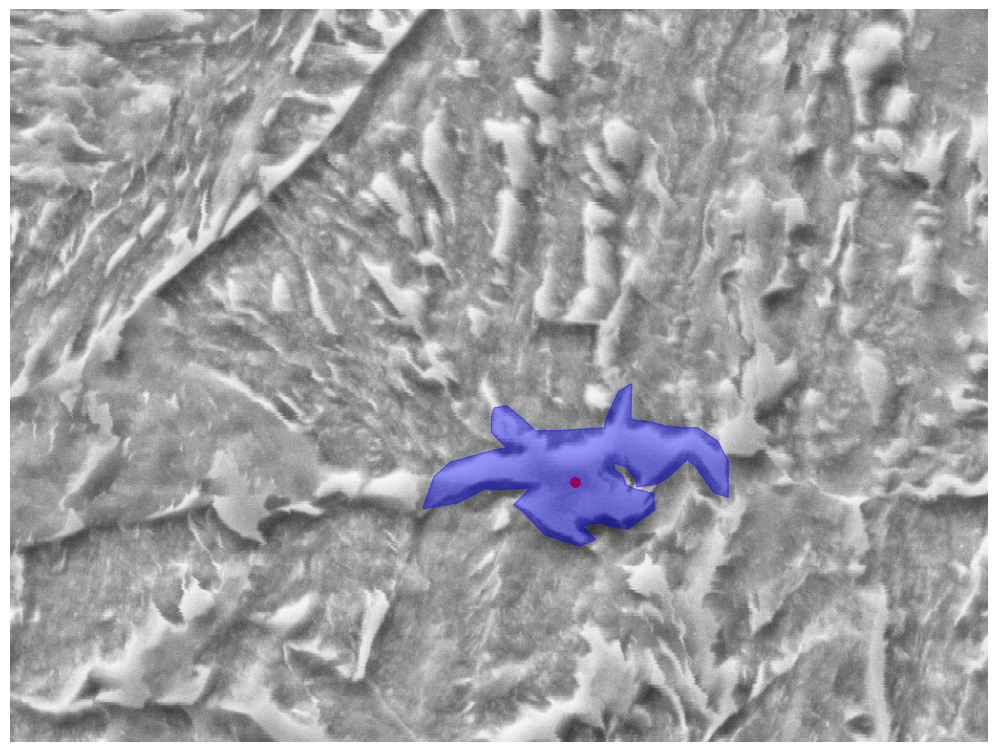

In [19]:
# Provide the index of an object within the dataframe and the dataframe as inputs.
visualizePOIPolygon(4222, dfAnnotationsPOIsAndPolygons)

### Visualize all polygons and points on a given image

In [20]:
import matplotlib.image as mpimg

def visualizeAllPOIPolygonOnAnImage(index, dfPOIPoly):
    dir = path_folder_images_png
    if index >= len(list(dfPOIPoly.image_url.unique())):
        print("Index out of bounds. The dataframe includes ", len(list(dfPOIPoly.url.unique())), " images.")
    else:
        image = list(dfPOIPoly.image_url.unique())[index]
        dfPolyPoiInThisImage = dfPOIPoly.loc[dfPOIPoly['image_url']==image]

        lstPoint = []
        for i, row in dfPolyPoiInThisImage.iterrows():
            lstPoint.append((row['point']))

        lstPoly= []
        for i, row in dfPolyPoiInThisImage.iterrows():
            lstPoly.append((row['polygon']))

        img = mpimg.imread(dir + image)

        f = displayImageWithAnnotations(img, lstPoint, lstPoly)
        return f


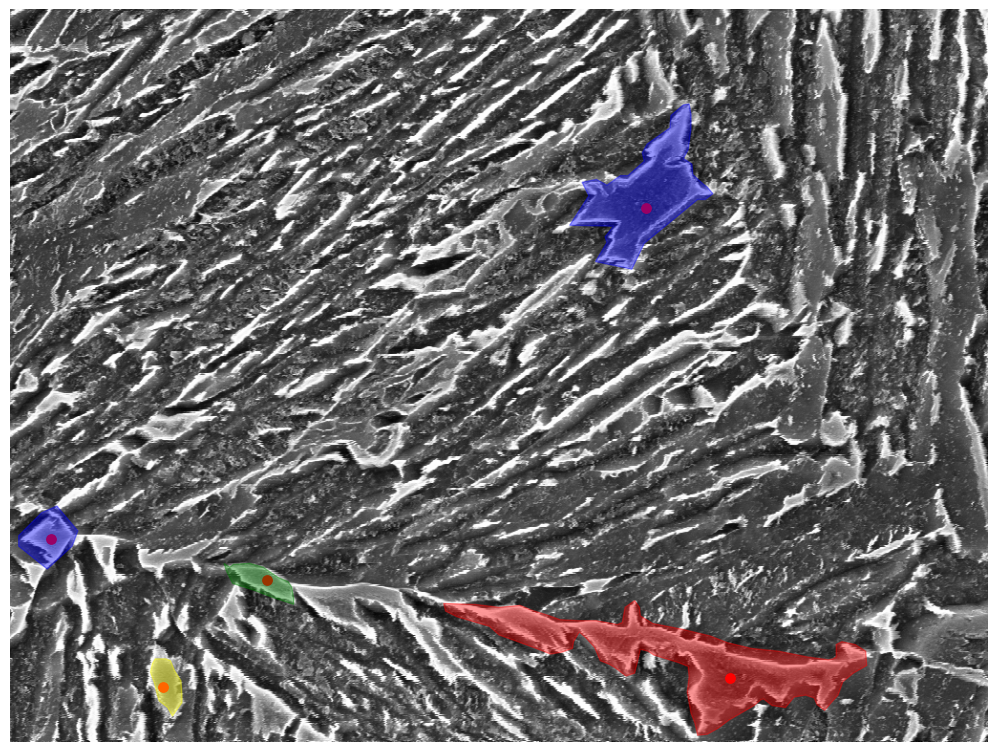

In [21]:
# Provide the index of an image within the dataframe and the dataframe as inputs.
visualizeAllPOIPolygonOnAnImage(555, dfAnnotationsPOIsAndPolygons)

___
## Morphological Features
If you do not need to re-calculate the morphological features, you can directly execute the following code to load the pre-calculated data.

The pre-calculated features are the following. 
- point_shapely: The Shapely representation of the point.
- poly_shapely: The Shapely representation of the polygon.
- polygon_area: The area of polygons in pixel-units. 
- polygon_area_metric: The area of polygons in micrometers.
- polygon_perimeter: The perimeter of the polygon in pixel-units.
- polygon_perimeter_metric: The perimeter of the polygon in micrometers.
- height: The height of the rectangle that bounds the polygon in pixel-units.  
- width: The width of the rectangle that bounds the polygon in pixel-units.
- aspect_ratio: The height divided by width.
- polygon_compactness: Calculated Polsby-Popper compactness. 
- rotation_angle_polygon: The angle of tilted minimum bounding rectangle. The minimum bounding rectangle was calculated using David Butterworth's code. https://github.com/dbworth/minimum-area-bounding-rectangle

In [22]:
import pandas as pd 
import pickle

with open(path_file_annotations_morphology, 'rb') as handle:
    dfMorphologicalFeatures= pickle.load(handle)


In [23]:
dfMorphologicalFeatures.columns

Index(['image_url', 'point', 'polygon', 'point_shapely', 'poly_shapely',
       'polygon_area', 'polygon_area_metric', 'polygon_perimeter',
       'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width',
       'polygon_compactness', 'rotation_angle_polygon'],
      dtype='object')

In [24]:
dfMorphologicalFeatures[['polygon_area', 'polygon_area_metric', 'polygon_perimeter',
       'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width',
       'polygon_compactness', 'rotation_angle_polygon']].describe()

,polygon_area,polygon_area_metric,polygon_perimeter,polygon_perimeter_metric,aspect_ratio,height,width,polygon_compactness,rotation_angle_polygon
count,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,11135.883611,1.927958,562.622393,7.402926,1.030346,139.830466,155.323942,0.456448,92.834373
std,13058.812088,2.260875,392.687224,5.166937,0.545767,83.531001,97.519387,0.163137,49.552412
min,324.000000,0.056094,69.229688,0.910917,0.119403,21.000000,17.000000,0.057774,0.172059
25%,4341.500000,0.751645,321.600438,4.231585,0.656051,85.000000,91.000000,0.331784,54.865807
50%,7248.000000,1.254848,451.723946,5.943736,0.908730,118.000000,129.000000,0.448430,92.862405
75%,13083.500000,2.265149,677.270318,8.911452,1.255102,171.000000,189.000000,0.574021,131.227716
max,205015.000000,35.494287,4477.596563,58.915744,6.481481,766.000000,857.000000,0.925462,180.000000


___

## Calculation of Morphological Features

To ease the calculation of morphological features, and the comparison of polygon objects, we use the library Shapely as an alternative representation of geometrical objects. 

This section has all the necessary code to calculate the morphological features. If you only need the results, you can skip this section and load the pre-calculated dataframe in the previous section.

The features that will be calculated in this section are the following. 
- point_shapely: The Shapely representation of the point.
- poly_shapely: The Shapely representation of the polygon.
- polygon_area: The area of polygons in pixel-units. 
- polygon_area_metric: The area of polygons in micrometers.
- polygon_perimeter: The perimeter of the polygon in pixel-units.
- polygon_perimeter_metric: The perimeter of the polygon in micrometers.
- height: The height of the rectangle that bounds the polygon in pixel-units.  
- width: The width of the rectangle that bounds the polygon in pixel-units.
- aspect_ratio: The height divided by width.
- polygon_compactness: Calculated Polsby-Popper compactness. 
- rotation_angle_polygon: The angle of tilted minimum bounding rectangle. The minimum bounding rectangle was calculated using David Butterworth's code. https://github.com/dbworth/minimum-area-bounding-rectangle


In [ ]:
import pandas as pd 
import ast
import pickle

# Load the POI and Polygon annotation data frame. 
dfAnnotationsPOIsAndPolygons = pd.read_csv(path_file_annotations_POIs_polygons, sep=";", converters={"point": ast.literal_eval, "polygon": ast.literal_eval})

In [25]:
# Every micrometer is equivalent to 76 pixels in 1-dimension (length)
def convertPixelLengthToMicrometer(f):
    m = f / 76
    return m

# Every micrometer is equivalent to 76 * 76 pixels in 2-D (area)
def convertPixelAreaToMicrometer(f_area):
    m_area = f_area / (76*76)
    return m_area

from shapely.geometry import Polygon, Point
# Find the bounding box, get height, width, and the aspect ratio
def getAspectRatio(shapely_polygon):
    try:
        bbox = shapely_polygon.bounds
        height = bbox[3] - bbox[1]
        width = bbox[2] - bbox[0]
        aspect_ratio = height / width
    except Exception as e: 
        print('Exception in aspect ratio calculation. Please make sure the Shapely polygon object is valid before calling the method. ', e)
        aspect_ratio, height, width = -1, -1, -1
    return aspect_ratio, height, width

In [ ]:
# Traverse over the annotated polygons dataframe, transform the objects into Shapely data structures.

from shapely.geometry import Polygon, Point
objList = []
for index, row in dfAnnotationsPOIsAndPolygons.iterrows():
    point_shapely = Point(row['point'])
    poly_shapely = Polygon(row['polygon'])
    
    polygon_area = poly_shapely.area
    polygon_area_metric = convertPixelAreaToMicrometer(polygon_area)
    
    polygon_perimeter = poly_shapely.length
    polygon_perimeter_metric = convertPixelLengthToMicrometer(polygon_perimeter)
    
    aspect_ratio, height, width = getAspectRatio(poly_shapely)
    
    objList.append([row['image_url'], row['point'], row['polygon'], point_shapely, poly_shapely, polygon_area, polygon_area_metric, polygon_perimeter, polygon_perimeter_metric, aspect_ratio, height, width])
    
dfPOIPolyShapely = pd.DataFrame(objList, columns=['image_url', 'point', 'polygon', 'point_shapely', 'poly_shapely',  'polygon_area', 'polygon_area_metric', 'polygon_perimeter', 'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width'])                                              

In [ ]:
dfPOIPolyShapely.head()

In [ ]:
dfPOIPolyShapely.columns

In [ ]:
dfPOIPolyShapely[['polygon_area', 'polygon_area_metric', 'polygon_perimeter', 'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width']].describe()

### Calculated Characteristics: Complexity and Rotation Angle

Please execute the following method definitions before proceeding with further calculation.

In [26]:
def getAngle(a, origin, c):
    ang = math.degrees(math.atan2(c[1]-origin[1], c[0]-origin[0]) - math.atan2(a[1]-origin[1], a[0]-origin[0]))
    return ang + 360 if ang < 0 else ang

import math
def calculatePolsbyPopperCompactedness(polygon):
    return (4 * math.pi * polygon.area)  / (polygon.length ** 2)

from poly_complexity import minBoundingRect

Iterate through the polygon dataframe to calculate the Polsby-Popper compactness score and minBoundingBox angle. 

In [ ]:
import tqdm
import pandas as pd
import math
from shapely.geometry import Polygon, Point, MultiPolygon 
listCharacteristicsCalculations = []
for i in tqdm.tqdm(dfPOIPolyShapely.index):
    row = dfPOIPolyShapely.iloc[i]
    try:
        gold_poly = row["poly_shapely"]        
        gold_compactness = calculatePolsbyPopperCompactedness(gold_poly)
        _, gold_rot_angle, _, _, _, _, _ = minBoundingRect(gold_poly)

        listCharacteristicsCalculations.append([row['image_url'], row['point'], row['polygon'], row['point_shapely'], row['poly_shapely'], 
                                                row['polygon_area'], row['polygon_area_metric'], row['polygon_perimeter'],  row['polygon_perimeter_metric'], 
                                                row['aspect_ratio'],  row['height'], row['width'], gold_compactness, gold_rot_angle])
    except Exception as exp:
        print('Exception at', i, exp)
        pass
    
print(len(listCharacteristicsCalculations))
dfcalculatedFeatures = pd.DataFrame(listCharacteristicsCalculations,  columns=['image_url', 'point', 'polygon', 'point_shapely', 'poly_shapely', 'polygon_area', 'polygon_area_metric', 'polygon_perimeter', 'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width', 'polygon_compactness', 'rotation_angle_polygon'])
                                                                      

In [28]:
dfcalculatedFeatures.head()

,image_url,point,polygon,point_shapely,poly_shapely,polygon_area,polygon_area_metric,polygon_perimeter,polygon_perimeter_metric,aspect_ratio,height,width,polygon_compactness,rotation_angle_polygon
0,IMG_01457.png,"(627, 319)","[(720, 288), (725, 294), (731, 300), (737, 302...",POINT (627 319),"POLYGON ((720 288, 725 294, 731 300, 737 302, ...",8300.0,1.436981,496.770896,6.536459,0.377880,82.0,217.0,0.422645,102.633362
1,IMG_01457.png,"(820, 288)","[(823, 268), (835, 271), (856, 276), (898, 281...",POINT (820 288),"POLYGON ((823 268, 835 271, 856 276, 898 281, ...",11433.5,1.979484,814.751259,10.720411,0.323333,97.0,300.0,0.216441,78.756459
2,IMG_01457.png,"(881, 523)","[(871, 542), (859, 527), (848, 526), (858, 509...",POINT (881 523),"POLYGON ((871 542, 859 527, 848 526, 858 509, ...",1303.5,0.225675,159.773802,2.102287,0.500000,33.0,66.0,0.641667,88.602819
3,IMG_01457.png,"(477, 353)","[(427, 358), (479, 342), (522, 329), (523, 342...",POINT (477 353),"POLYGON ((427 358, 479 342, 522 329, 523 342, ...",1648.0,0.285319,233.602563,3.073718,0.437500,42.0,96.0,0.379500,107.102729
4,IMG_01457.png,"(520, 737)","[(511, 717), (556, 721), (556, 729), (536, 734...",POINT (520 737),"POLYGON ((511 717, 556 721, 556 729, 536 734, ...",1656.5,0.286790,194.810427,2.563295,0.545455,42.0,77.0,0.548500,84.920392


In [29]:
dfcalculatedFeatures.columns

Index(['image_url', 'point', 'polygon', 'point_shapely', 'poly_shapely',
       'polygon_area', 'polygon_area_metric', 'polygon_perimeter',
       'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width',
       'polygon_compactness', 'rotation_angle_polygon'],
      dtype='object')

In [30]:
dfcalculatedFeatures[['polygon_area', 'polygon_area_metric', 'polygon_perimeter',
       'polygon_perimeter_metric', 'aspect_ratio', 'height', 'width',
       'polygon_compactness', 'rotation_angle_polygon']].describe()

,polygon_area,polygon_area_metric,polygon_perimeter,polygon_perimeter_metric,aspect_ratio,height,width,polygon_compactness,rotation_angle_polygon
count,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000,8909.000000
mean,11135.883611,1.927958,562.622393,7.402926,1.030346,139.830466,155.323942,0.456448,92.834373
std,13058.812088,2.260875,392.687224,5.166937,0.545767,83.531001,97.519387,0.163137,49.552412
min,324.000000,0.056094,69.229688,0.910917,0.119403,21.000000,17.000000,0.057774,0.172059
25%,4341.500000,0.751645,321.600438,4.231585,0.656051,85.000000,91.000000,0.331784,54.865807
50%,7248.000000,1.254848,451.723946,5.943736,0.908730,118.000000,129.000000,0.448430,92.862405
75%,13083.500000,2.265149,677.270318,8.911452,1.255102,171.000000,189.000000,0.574021,131.227716
max,205015.000000,35.494287,4477.596563,58.915744,6.481481,766.000000,857.000000,0.925462,180.000000


In [ ]:
## Dump the new dataframe as pickle. The following code is commented-out to avoid execution by mistake. Please, uncomment the code statement below and execute if needed.
import pickle
#with open(path_file_annotations_morphology, 'wb') as handle:
#    pickle.dump(dfcalculatedFeatures, handle, protocol=pickle.HIGHEST_PROTOCOL)


___